In [1]:
from fastai.tabular.all import *

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#drop id 
df = df.drop(columns='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
#convert age from days to years
df['age'] = df['age']/365
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
splits = RandomSplitter(seed=42)(df)

In [8]:

to = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],
                    cat_names=['gender','cholesterol','gluc','smoke','alco','active'],
                    cont_names=['age', 'height','weight','ap_hi','ap_lo'],
                    y_names='cardio', y_block = CategoryBlock(),
                   splits=splits)

In [9]:
to.xs.iloc[:2]

,gender,cholesterol,gluc,smoke,alco,active,age,height,weight,ap_hi,ap_lo
56394,1,1,1,1,1,2,1.511133,-1.254781,-0.359841,-0.056298,-0.034869
53964,1,1,1,1,1,2,1.529760,-0.405782,0.890448,0.135912,-0.088027


In [10]:
dls = to.dataloaders(bs=64)

In [11]:
dls.show_batch()

,gender,cholesterol,gluc,smoke,alco,active,age,height,weight,ap_hi,ap_lo,cardio
0,2,1,1,1,0,1,55.920548,169.0,77.000000,120.000000,80.000000,0
1,1,1,1,0,0,1,61.613697,166.0,65.000000,110.000000,69.999999,1
2,1,1,1,0,0,1,57.909588,162.0,86.000000,120.000000,80.000000,0
3,1,1,1,0,0,1,57.778084,168.0,98.000001,140.000000,90.000000,1
4,2,1,1,0,0,1,64.372604,170.0,75.000000,160.000001,69.999999,1
5,1,1,1,0,0,1,50.238358,149.0,73.000000,110.000000,69.999999,0
6,1,1,1,0,0,0,43.619179,154.0,61.000000,100.000001,60.000001,0
7,2,3,1,0,0,1,42.249313,174.0,73.000000,120.000000,80.000000,0
8,1,1,1,0,0,1,64.586303,159.0,63.000000,120.000000,80.000000,1
9,1,1,1,0,0,1,53.789040,155.0,64.000000,140.000000,90.000000,1


In [12]:
learn = tabular_learner(dls, metrics=accuracy,layers=[10,10])

In [13]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.571257,0.584715,0.707500,00:09
1,0.552436,0.585693,0.713571,00:08
2,0.549163,0.555668,0.730500,00:09
3,0.541061,0.549398,0.731429,00:09
4,0.550128,0.623613,0.657786,00:07


In [14]:
learn.show_results()

,gender,cholesterol,gluc,smoke,alco,active,age,height,weight,ap_hi,ap_lo,cardio,cardio_pred
0,2.0,1.0,1.0,1.0,1.0,2.0,0.415764,0.079360,-0.012538,-0.056298,-0.088027,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,2.0,-0.561766,0.564502,-0.359841,-0.056298,-0.088027,0.0,0.0
2,2.0,1.0,1.0,1.0,1.0,2.0,-0.550833,1.898642,4.919155,0.007772,-0.034869,0.0,0.0
3,2.0,1.0,1.0,1.0,1.0,2.0,0.387418,0.807073,-0.220920,-0.056298,-0.088027,0.0,0.0
4,1.0,3.0,1.0,1.0,1.0,2.0,0.437631,0.200645,1.654513,0.071842,-0.194343,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,2.0,-1.441706,0.564502,-0.498762,-0.056298,-0.088027,0.0,0.0
6,1.0,1.0,1.0,1.0,1.0,2.0,0.666019,0.443216,0.265303,0.071842,-0.034869,1.0,1.0
7,2.0,1.0,1.0,2.0,2.0,2.0,-1.046887,1.898642,0.473685,-0.056298,-0.088027,0.0,0.0
8,1.0,1.0,1.0,1.0,1.0,2.0,-0.482398,0.079360,-0.429301,-0.056298,-0.088027,0.0,0.0


SuggestedLRs(slide=0.14454397559165955, valley=0.015848932787775993)

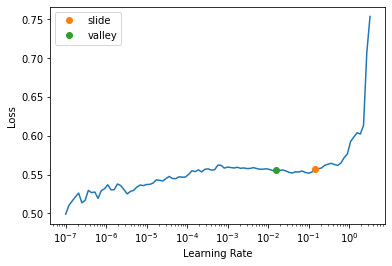

In [62]:
learn.lr_find(suggest_funcs=(slide, valley))

In [63]:
learn.fit(16, lr=0.03)

epoch,train_loss,valid_loss,accuracy,time
0,0.557791,0.621683,0.653643,00:08
1,0.549057,0.555526,0.723286,00:07
2,0.546376,0.555984,0.730429,00:07
3,0.549752,0.554449,0.722357,00:08
4,0.557385,0.614759,0.671571,00:08
5,0.557163,0.560817,0.723857,00:07
6,0.547205,0.553386,0.727429,00:08
7,0.550473,0.549205,0.732357,00:08
8,0.555433,0.585592,0.700000,00:07
9,0.549945,0.547725,0.731786,00:07


In [66]:
interp = Interpretation.from_learner(learn)

In [67]:
interp.plot_top_losses(9)

In [69]:
learn.show_results()

,gender,cholesterol,gluc,smoke,alco,active,age,height,weight,ap_hi,ap_lo,cardio,cardio_pred
0,2.0,2.0,1.0,1.0,1.0,1.0,-0.551643,-0.527068,-0.984985,0.007772,-0.034869,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,2.0,-1.485439,-0.527068,0.265303,-0.056298,-0.088027,0.0,0.0
2,1.0,2.0,1.0,1.0,1.0,1.0,-0.899083,-0.648353,1.793434,-0.056298,-0.088027,1.0,0.0
3,1.0,1.0,1.0,1.0,1.0,2.0,-1.091431,-0.890924,0.820987,0.199982,0.018289,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,2.0,-1.968536,1.292215,-0.220920,-0.056298,-0.088027,0.0,0.0
5,1.0,1.0,1.0,1.0,1.0,2.0,0.107198,0.928358,-0.290380,-0.120368,-0.141185,1.0,0.0
6,1.0,2.0,2.0,1.0,1.0,1.0,-1.905365,1.534786,-0.290380,-0.056298,-0.088027,0.0,0.0
7,1.0,1.0,1.0,1.0,1.0,2.0,0.879828,0.564502,-0.359841,-0.056298,-0.088027,0.0,0.0
8,2.0,2.0,1.0,1.0,1.0,1.0,-1.033524,-0.041926,1.515592,-0.120368,-0.141185,0.0,0.0


In [73]:
??tabular_learner

In [79]:
!pip install fastdot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from fastdot import *

SuggestedLRs(valley=0.005248074419796467)

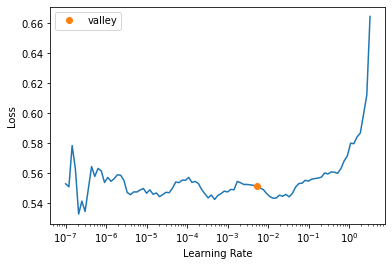

In [16]:
learn.lr_find()

In [18]:
learn.fit(10, 0.005)

epoch,train_loss,valid_loss,accuracy,time
0,0.547211,0.553087,0.731429,00:08
1,0.557019,0.553499,0.729286,00:07
2,0.551405,0.562759,0.727643,00:08
3,0.551185,0.546944,0.732786,00:08
4,0.550375,0.562305,0.731786,00:07
5,0.544769,0.618696,0.661714,00:08
6,0.542608,0.545178,0.734643,00:08
7,0.553260,0.545900,0.733143,00:07
8,0.560162,0.634695,0.639857,00:08
9,0.551229,0.565513,0.729143,00:08


In [19]:
learn.summary()

TabularModel (Input shape: 64 x 6)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 3              
Embedding                                 9          True      
Embedding                                 12         True      
Embedding                                 12         True      
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9          True      
Dropout                                                        
BatchNorm1d                               10         True      
____________________________________________________________________________
                     64 x 10             
Linear                                    230        True      
ReLU                                                           
BatchNorm1d                               20         True      
Linear                              